In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('/Users/rpghosh/python-examples/aviyel/stock_data.csv', encoding='ISO-8859-1')

In [9]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [13]:
df.describe(include=['object','int64'], percentiles=[0.2,0.4,0.6,0.8]).transpose()

,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
Text,5791,5791,BVSN wow that was the perfect short from 11.50.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,5791,NaN,NaN,NaN,0.272664,0.962192,-1,-1,1,1,1,1,1


In [14]:
df.groupby(['Sentiment']).size()

Sentiment
-1    2106
 1    3685
dtype: int64

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

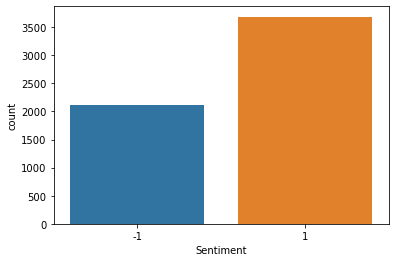

In [16]:
sns.countplot(x=df['Sentiment'])

In [17]:
import re

In [18]:
# remove punctuations 
df['Text'] = df['Text'].apply( lambda text: re.sub('[^A-Za-z]', ' ', text) )

In [19]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user AAP MOVIE return for the FEA GEED i...,1
2,user I d be afraid to short AMZN they are lo...,1
3,MNTA Over,1
4,OI Over,1


In [20]:
# conver tto lower
df['Text'] = df['Text'].apply( lambda text : text.lower() )

In [21]:
df.head()

,Text,Sentiment
0,kickers on my watchlist xide tit soq pnk cpw b...,1
1,user aap movie return for the fea geed i...,1
2,user i d be afraid to short amzn they are lo...,1
3,mnta over,1
4,oi over,1


In [22]:
# word tokenize

In [23]:
from nltk.tokenize import word_tokenize 

In [24]:
df['Text'] = df['Text'].apply(lambda text: word_tokenize(text))

In [25]:
df.head()

,Text,Sentiment
0,"[kickers, on, my, watchlist, xide, tit, soq, p...",1
1,"[user, aap, movie, return, for, the, fea, geed...",1
2,"[user, i, d, be, afraid, to, short, amzn, they...",1
3,"[mnta, over]",1
4,"[oi, over]",1


In [26]:
# remove stopwords

In [27]:
from nltk.corpus import stopwords
stopwds = [word.lower() for word in stopwords.words('english')]

In [28]:
df['Text'] = df['Text'].apply( lambda wordList: [word.lower() for word in wordList if word.lower() not in stopwds] )

In [29]:
df.head()

,Text,Sentiment
0,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",1
1,"[user, aap, movie, return, fea, geed, indicato...",1
2,"[user, afraid, short, amzn, looking, like, nea...",1
3,[mnta],1
4,[oi],1


In [30]:
# lemmatize

In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
wd = WordNetLemmatizer()

In [33]:
df['Text'] = df['Text'].apply( lambda text : [ wd.lemmatize(word) for word in text ] )

In [34]:
df.head()

,Text,Sentiment
0,"[kicker, watchlist, xide, tit, soq, pnk, cpw, ...",1
1,"[user, aap, movie, return, fea, geed, indicato...",1
2,"[user, afraid, short, amzn, looking, like, nea...",1
3,[mnta],1
4,[oi],1


In [35]:
# convert the list to text for each row in Text column

In [36]:
df['Text'] = df['Text'].apply( lambda textList : ' '.join(textList))

In [37]:
df.head()

,Text,Sentiment
0,kicker watchlist xide tit soq pnk cpw bpz aj t...,1
1,user aap movie return fea geed indicator trade...,1
2,user afraid short amzn looking like near monop...,1
3,mnta,1
4,oi,1


In [43]:
# LAbel Encoding to make the Sentiment column of two classes 0 and 1 , instead of -1 and +1 

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
lblEncode = LabelEncoder()

In [46]:
df['Sentiment'] = lblEncode.fit_transform(df['Sentiment'])

In [47]:
df.Sentiment.unique()

array([1, 0])

In [84]:
len(df)

5791

In [48]:
# convert it to Vector using TF-IDF method

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
tf = TfidfVectorizer()
#tf = TfidfVectorizer(max_features=2500)

In [77]:
X = tf.fit_transform(df['Text'])

In [78]:
# this is a sparse matrix
type(X)

scipy.sparse.csr.csr_matrix

In [79]:
X.shape

(5791, 8330)

In [85]:
# so there are a total of 8300 features we can reduce it to say 1000

In [86]:
tf = TfidfVectorizer(max_features=1000)

In [88]:
X = tf.fit_transform(df['Text'])

In [89]:
type(X)

scipy.sparse.csr.csr_matrix

In [90]:
X = X.toarray()

In [91]:
type(X)

numpy.ndarray

In [92]:
X.nonzero()

(array([   0,    0,    0, ..., 5790, 5790, 5790]),
 array([671, 762, 896, ..., 834, 843, 888]))

In [93]:
# see how the sparse matrix is defined
X[0][671], X[0][896], X[5790][843]

(0.5347390004753055, 0.431224450048086, 0.3371200858782319)

In [94]:
X.shape

(5791, 1000)

In [95]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.22980579, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [96]:
y = df['Sentiment']

In [97]:
y.shape

(5791,)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [100]:
from sklearn.naive_bayes import MultinomialNB

In [101]:
model = MultinomialNB()

In [102]:
model = model.fit(X_train, y_train)

In [103]:
y_predict = model.predict(X_test)

In [104]:
y_predict

array([1, 1, 1, ..., 1, 0, 0])

In [105]:
y_test

4893    0
3852    1
2384    1
2350    0
4105    0
       ..
353     0
4737    0
3807    1
5260    0
5562    0
Name: Sentiment, Length: 1159, dtype: int64

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [107]:
accuracy_score(y_test, y_predict)

0.7299396031061259

In [108]:
confusion_matrix(y_test, y_predict)

array([[212, 246],
       [ 67, 634]])

In [109]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.46      0.58       458
           1       0.72      0.90      0.80       701

    accuracy                           0.73      1159
   macro avg       0.74      0.68      0.69      1159
weighted avg       0.74      0.73      0.71      1159

